In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv"
d = pd.read_csv(url, sep=";")

print(d.shape)
print(d.describe())


(544, 4)
           height      weight         age        male
count  544.000000  544.000000  544.000000  544.000000
mean   138.263596   35.610618   29.344393    0.472426
std     27.602448   14.719178   20.746888    0.499699
min     53.975000    4.252425    0.000000    0.000000
25%    125.095000   22.007717   12.000000    0.000000
50%    148.590000   40.057844   27.000000    0.000000
75%    157.480000   47.209005   43.000000    1.000000
max    179.070000   62.992589   88.000000    1.000000


In [14]:
height = d["height"].to_numpy()
age = d["age"].to_numpy()
adult_height = height[age >= 18]
print(f"Adult height - {adult_height.shape}")

male = d["male"].to_numpy()
adult = age >= 18

height_m = height[(adult) & (male == 1)]
height_f = height[(adult) & (male == 0)]

Adult height - (352,)


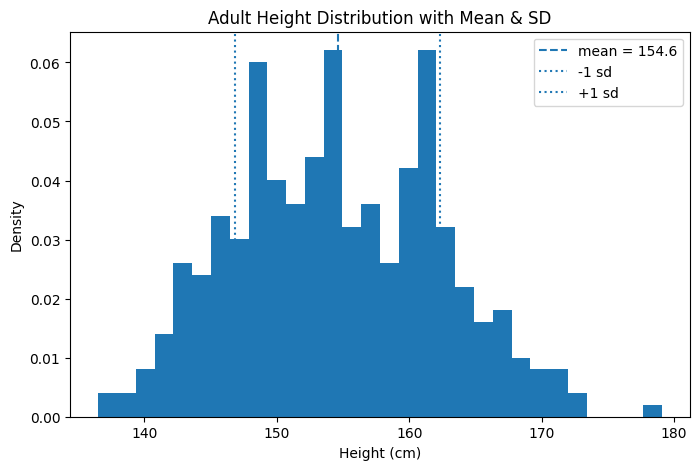

In [15]:
mu = adult_height.mean()
sd = adult_height.std()

plt.figure(figsize=(8, 5))
plt.hist(adult_height, bins=30, density=True)
plt.axvline(mu, linestyle="--", label=f"mean = {mu:.1f}")
plt.axvline(mu - sd, linestyle=":", label=f"-1 sd")
plt.axvline(mu + sd, linestyle=":", label=f"+1 sd")
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.title("Adult Height Distribution with Mean & SD")
plt.legend()
plt.show()


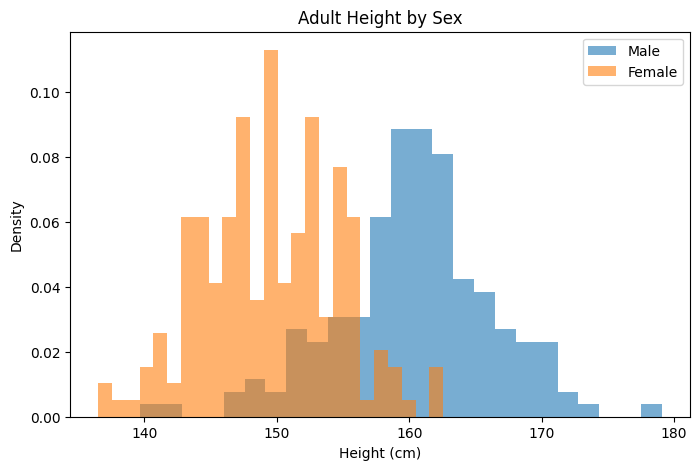

In [16]:
plt.figure(figsize=(8,5))
plt.hist(height_m, bins=25, density=True, alpha=0.6, label="Male")
plt.hist(height_f, bins=25, density=True, alpha=0.6, label="Female")
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.title("Adult Height by Sex")
plt.legend()
plt.show()


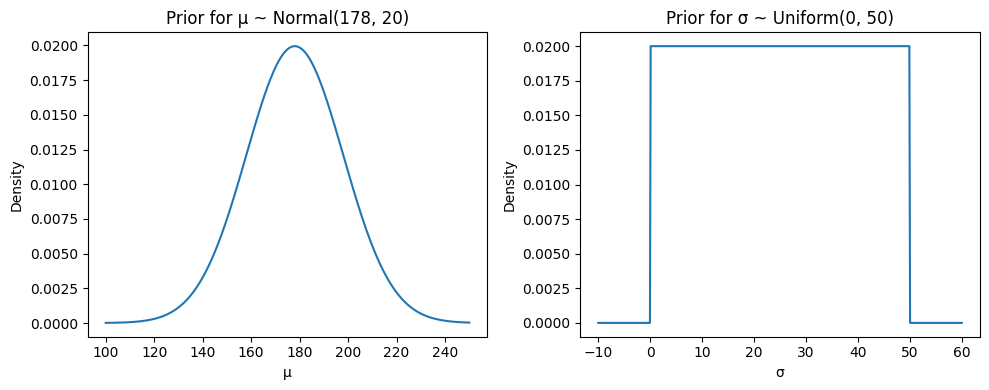

In [18]:
from scipy.stats import norm, uniform, gaussian_kde

#Prior parameters (match SR)
mu_mean, mu_sd = 178, 20
sigma_low, sigma_high = 0, 50

# Grid for plotting
x_mu = np.linspace(100, 250, 500)
x_sigma = np.linspace(-10, 60, 500)

# Prior pdfs
pdf_mu = norm.pdf(x_mu, loc=mu_mean, scale=mu_sd)
pdf_sigma = uniform.pdf(x_sigma, loc=sigma_low, scale=sigma_high - sigma_low)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(x_mu, pdf_mu)
plt.title("Prior for μ ~ Normal(178, 20)")
plt.xlabel("μ")
plt.ylabel("Density")

plt.subplot(1, 2, 2)
plt.plot(x_sigma, pdf_sigma)
plt.title("Prior for σ ~ Uniform(0, 50)")
plt.xlabel("σ")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

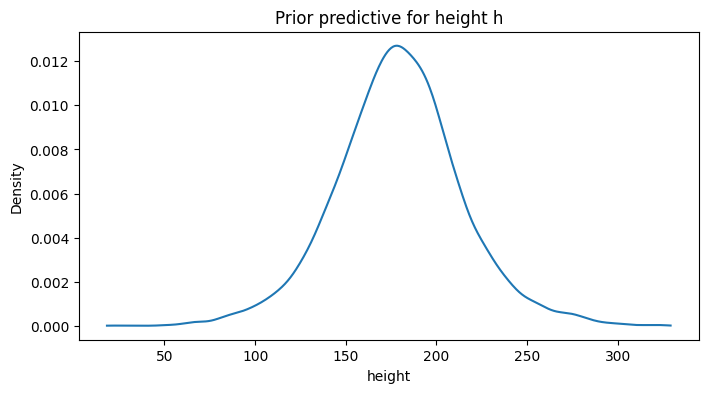

In [19]:
rng = np.random.default_rng(100)  # like set.seed(100)
n = 10_000

sample_mu = rng.normal(loc=mu_mean, scale=mu_sd, size=n)
sample_sigma = rng.uniform(low=sigma_low, high=sigma_high, size=n)

# IMPORTANT: vectorized Normal with per-sample μ and σ
prior_h = rng.normal(loc=sample_mu, scale=sample_sigma, size=n)

# Plot density (like dens())
kde = gaussian_kde(prior_h)
x_h = np.linspace(prior_h.min(), prior_h.max(), 600)

plt.figure(figsize=(8, 4))
plt.plot(x_h, kde(x_h))
plt.title("Prior predictive for height h")
plt.xlabel("height")
plt.ylabel("Density")
plt.show()


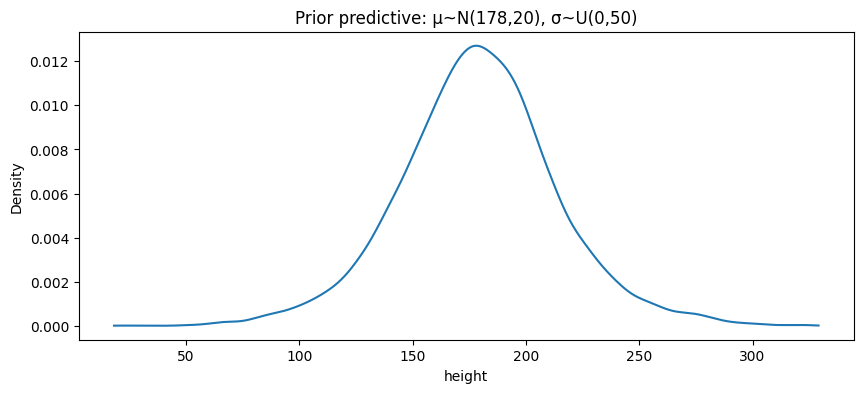

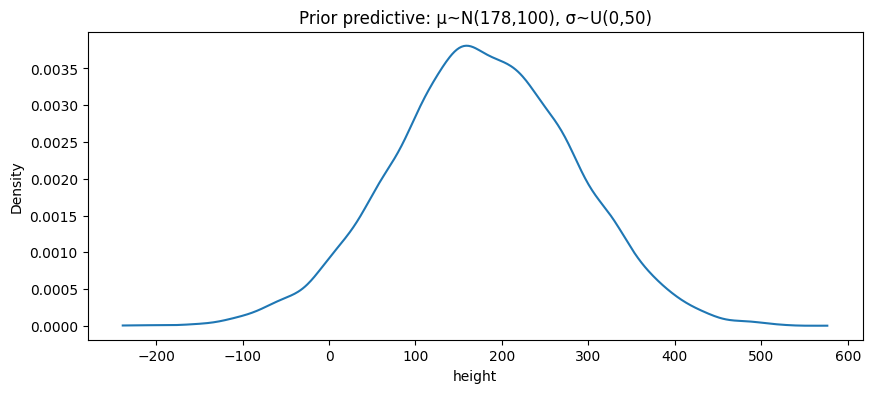

In [20]:
mu_sd_bad = 100

sample_mu_bad = rng.normal(loc=mu_mean, scale=mu_sd_bad, size=n)
sample_sigma_bad = rng.uniform(low=sigma_low, high=sigma_high, size=n)
prior_h_bad = rng.normal(loc=sample_mu_bad, scale=sample_sigma_bad, size=n)

kde_bad = gaussian_kde(prior_h_bad)
x_h_bad = np.linspace(prior_h_bad.min(), prior_h_bad.max(), 600)

plt.figure(figsize=(10, 4))
plt.plot(x_h, kde(x_h))
plt.title("Prior predictive: μ~N(178,20), σ~U(0,50)")
plt.xlabel("height"); plt.ylabel("Density")
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(x_h_bad, kde_bad(x_h_bad))
plt.title("Prior predictive: μ~N(178,100), σ~U(0,50)")
plt.xlabel("height"); plt.ylabel("Density")
plt.show()
